#### Задание 1

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [44]:
from sklearn.datasets import load_boston

In [45]:
boston = load_boston()

In [46]:
data = boston.data

In [47]:
feature_names = boston.feature_names

In [48]:
target = boston.target

In [49]:
X = pd.DataFrame(data, columns=feature_names)

In [50]:
y = pd.DataFrame(target, columns=['price'])

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
scaler = StandardScaler()

In [55]:
X_train_scaled = scaler.fit_transform(X_train)

In [85]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)


In [57]:
from sklearn.manifold import TSNE

In [58]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=100)

In [86]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

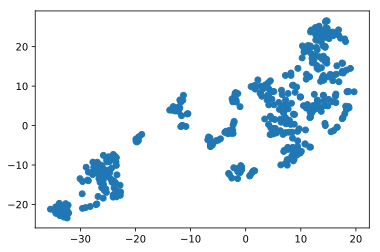

In [60]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1]);

#### Задание 2

In [61]:
from sklearn.cluster import KMeans

In [62]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [87]:
labels_train = kmeans.fit_predict(X_train_scaled)

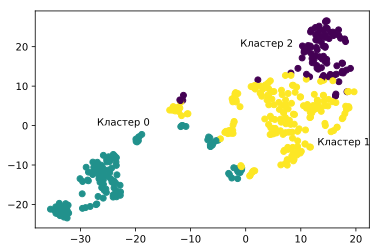

In [88]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.text(-27, 0, 'Кластер 0')
plt.text(13, -5, 'Кластер 1')
plt.text(-1, 20, 'Кластер 2');

In [89]:
y_train[labels_train==0].mean()

price    27.788372
dtype: float64

In [90]:
y_train[labels_train==1].mean()

price    16.165354
dtype: float64

In [91]:
y_train[labels_train==2].mean()

price    24.958115
dtype: float64

In [92]:
X_train.loc[labels_train==0, 'CRIM'].mean()

0.07356558139534884

In [93]:
X_train.loc[labels_train==1, 'CRIM'].mean()

10.797028425196851

In [94]:
X_train.loc[labels_train==2, 'CRIM'].mean()

0.4216602094240837

#### Задание 3

In [95]:
X_test_scaled = scaler.transform(X_test)

In [96]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

In [105]:
labels_test = kmeans.predict(X_test_scaled)

In [106]:
y_test[labels_test==0].mean()

price    31.35
dtype: float64

In [107]:
y_test[labels_test==1].mean()

price    16.437143
dtype: float64

In [108]:
y_test[labels_test==2].mean()

price    21.860784
dtype: float64

In [109]:
X_test.loc[labels_test==0, 'CRIM'].mean()

0.06206

In [110]:
X_test.loc[labels_test==1, 'CRIM'].mean()

10.165531142857143

In [111]:
X_test.loc[labels_test==2, 'CRIM'].mean()

0.2660788235294118